<a href="https://colab.research.google.com/github/DTSense/Webinar_DeepLearning_1/blob/main/1_kobar_latihan/DTSense-tensorflow2.0-tutorial-and-housing-price-prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediksi Harga Rumah - Dataset Boston Housing Price

Pada tutorial ini, kita akan memprediksi harga rumah dari dataset Boston Housing Price

## Predictive Model: Regression Analysis

Pada Machine-Learning khususnya supervised learning masalah yang di hadapi ada dua, iaitu **Regression** dan **Classification**. Pada gambar berikut bisa di lihat perbedaan antara regresi dan klasifikasi.

<img src="https://i.imgur.com/vvSoAzg.jpg" alt="classification_regression" width="400"/>

Analisis regresi adalah suatu solusi ketika diberikan input maka output yang diberikan berupa **continuous value**, sebagai contoh nilai berat badan atau nilai suhu temperatur. Sedangkan analisis klasifikasi adalah suatu solusi ketika diberikan suatu input, maka output yang di berikan berupa kelas atau kategori.

Untuk dataset perumahan Boston, kita mempunyai 506 baris data, dengan masing-masing 13 fitur. Tugas kita sekarang adalah membuat model regresi yang menggunakan 13 fitur ini sebagai masukan dan mengeluarkan prediksi nilai tunggal dari "nilai median rumah yang ditempati pemilik (dalam $ 1.000)." sebagai output.

In [2]:
# Import TensorFlow, Keras, dan Layers
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense

# Import module umum yang di perlukan (numpy, os, sys)
import numpy as np
import os
import sys

# Images, plots, display, and visualization (pandas, seaborn, matplotlib)
import matplotlib.pyplot as plt
import seaborn
import pandas as pd

print(tf.__version__)

2.3.0


In [4]:
# check location dengan os.getcwd()
print(os.getcwd())
# check isi folder dengan os.listdir()
os.listdir()

/content


['.config', 'datasets_106564_253992_boston.csv', 'sample_data']

In [5]:
# Read data csv dengan pandas
data = pd.read_csv('datasets_106564_253992_boston.csv')

# Perlihatkan 5 dataset pertama
data.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


CRIM per capita crime rate by town <br>
ZN proportion of residential land zoned for lots over 25,000 sq.ft. <br>
INDUS proportion of non-retail business acres per town <br>
CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) <br>
NOX nitric oxides concentration (parts per 10 million) <br>
RM average number of rooms per dwelling <br>
AGE proportion of owner-occupied units built prior to 1940 <br>
DIS weighted distances to five Boston employment centres <br>
RAD index of accessibility to radial highways <br>
TAX full-value property-tax rate per 10,000usd <br>
PTRATIO pupil-teacher ratio by town <br>
B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town <br>
LSTAT % lower status of the population <br>
MEDV Median value of owner-occupied homes (in $1000)

In [6]:
# Check the shape of dataframe
data.shape

(506, 14)

In [7]:
# Check column of data frame
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [8]:
# Check data types in data frame
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NX         float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [9]:
# Identifying the unique number of values in the dataset
data.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NX          81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

In [10]:
# Reset index sehingga nama column menjadi index
nu = data.nunique().reset_index()
nu

,index,0
0,CRIM,504
1,ZN,26
2,INDUS,76
3,CHAS,2
4,NX,81
5,RM,446
6,AGE,356
7,DIS,412
8,RAD,9
9,TAX,66


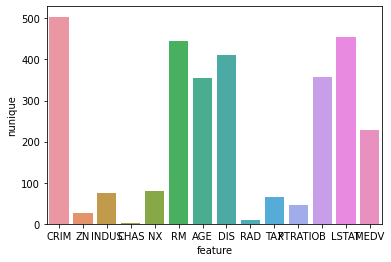

In [12]:
# Rubah column di data baru dengan nama column yang baru lalu visualisasikan dengan seaborn
import seaborn as sns
nu.columns = ['feature', 'nunique']
ax = sns.barplot(x='feature', y='nunique', data=nu)

In [13]:
# Check for missing values
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NX         0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [14]:
# See rows with missing values
data[data.isnull().any(axis=1)]

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV


In [15]:
# Viewing the data statistics
data.describe()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [16]:
# Finding out the correlation between the features
corr = data.corr()
corr.shape

(14, 14)

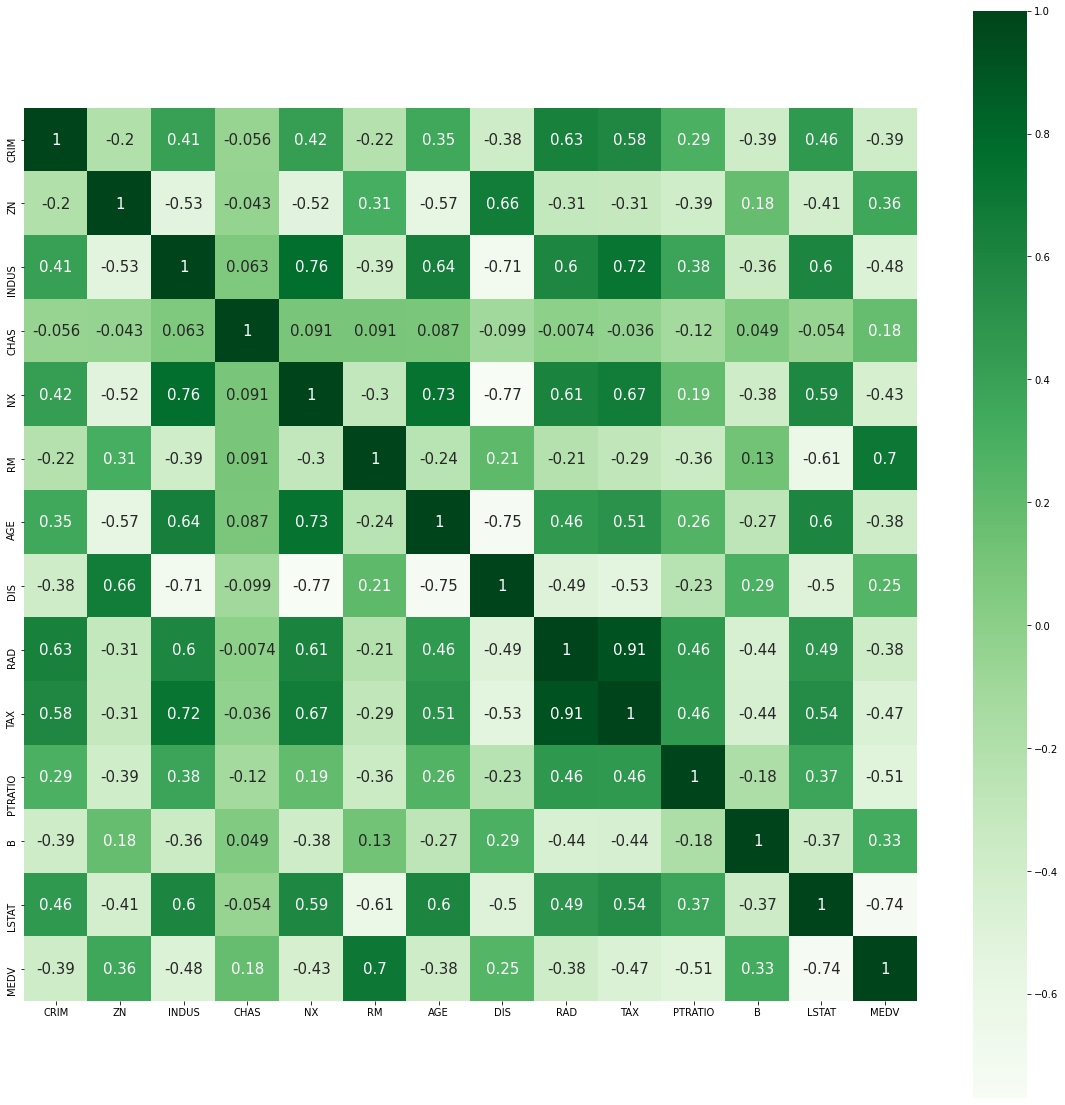

In [19]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square=True, annot=True, annot_kws={'size':15}, cmap='Greens')

In [20]:
# Spliting target variable and independent variables
X = data.drop(['MEDV'], axis = 1)
y = data['MEDV']

In [21]:
# Splitting to training and testing data, gunakan konvensi X_train, X_test, y_train, y_test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=4)

## Preparing the data

We are going to do a feature normalization . Feature normalizaion is when you subtract the mean of the feature from each feature and divide each result by the standard deviation.


In [22]:
# Biar lebih mudah di mengerti ganti dari X_ menjadi Feature_ dan y_ menjadi label_ *optional
feature_train = X_train
feature_test = X_test
label_train = y_train
label_test = y_test

In [23]:
# Gunakan approach Normalization untuk smoothing the data. Rumus (feature_train - train_mean) / train_std
# Using per-feature statistics (mean, standard deviation) from the training set to do Normalization
# Normalization digunakan pada training data, tidak langsung pada test data

train_mean = np.mean(feature_train, axis=0)
train_std = np.std(feature_train, axis = 0)

feature_train_norm = (feature_train - train_mean) / train_std


# Note that the quantities used for normalizing the test data are computed using the
# training data. You should never use in your workflow any quantity computed on the
# test data, even for something as simple as data normalization.

In [24]:
feature_train_norm

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
192,-0.427448,1.484011,-1.114239,-0.256833,-1.021915,1.273277,-1.517903,1.262452,-0.543255,-0.088856,-1.509687,0.365233,-1.374464
138,-0.408222,-0.479907,1.574679,-0.256833,0.569434,-0.583574,1.044346,-0.993784,-0.656796,0.140768,1.257406,0.382577,1.182332
251,-0.412430,0.480231,-0.761546,-0.256833,-1.072975,0.233103,-2.137974,1.692437,-0.316173,-0.489225,0.288924,0.215063,-1.274687
13,-0.363451,-0.479907,-0.429257,-0.256833,-0.162417,-0.454255,-0.252815,0.431323,-0.656796,-0.624644,1.165170,0.436961,-0.627519
256,-0.435844,3.447930,-1.069059,-0.256833,-1.387840,1.661233,-1.236376,1.195063,-0.770337,-0.995575,-1.186859,0.318794,-1.341205
...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,1.543294,-0.479907,1.022321,-0.256833,1.216185,-1.398845,1.040783,-1.107506,1.614026,1.489070,0.796224,0.436961,2.497454
197,-0.432159,3.011503,-1.394061,-0.256833,-1.302742,1.173476,-1.150849,1.651310,-0.883878,-0.495113,-2.708761,-0.039621,-0.579016
439,0.668850,-0.479907,1.022321,-0.256833,1.556581,-0.906871,0.891110,-0.924097,1.614026,1.489070,0.796224,0.436961,1.398517
174,-0.427703,-0.479907,-1.025337,-0.256833,-0.400694,-0.580762,-0.006924,-0.509213,-0.543255,-0.689410,-0.864032,0.395893,-0.436279


### Membuat Machine Learning Model

Membuat NN membutuhkan konfigurasi lapisan model, kemudian menyusun model. Pertama kita menumpuk beberapa lapisan bersama-sama menggunakan `keras.Sequential`. Selanjutnya kita mengkonfigurasi fungsi **loss**, **optimizer**, dan **Metrics** untuk kita pantau. Ini ditambahkan selama langkah kompilasi model:

* *Loss function* - mengukur seberapa akurat model selama pelatihan, dan untuk meminimalisir nilai loss, kita menggunakan optimizer.
* *Optimizer* - bagaimana model diperbarui berdasarkan data yang terlihat beserta loss functionnya.
* *Metrics* - digunakan untuk memantau langkah-langkah pelatihan dan pengujian.

Mari membangun jaringan dengan 1 lapisan tersembunyi dari 20 neuron, dan menggunakan mean squared error (MSE) sebagai fungsi kerugian (yang paling umum untuk masalah regresi):

In [26]:
# Buat Machine learning Model di dalam function build_model()
def build_model():
    model = keras.Sequential([
        Dense(64, activation=tf.nn.relu, input_shape=[13]),
        Dense(1)
    ])
    # Jangan lupa untuk compile model
    model.compile(optimizer="adam", loss="mse", metrics=['mae', 'mse'])
    return model

### Train the model

Training the neural network model requires the following steps:

1. Feed the training data to the model—in this example, the `train_features` and `train_labels` arrays.
2. The model learns to associate features and labels.
3. We ask the model to make predictions about a test set—in this example, the `test_features` array. We verify that the predictions match the labels from the `test_labels` array. 

To start training,  call the `model.fit` method—the model is "fit" to the training data:

In [27]:
# this helps makes our output less verbose but still shows progress
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

# Call build_model to variable model
model = build_model()

# Definisikan early stopping
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)

# Training dengan metode .fit() dan masukkan ke variable history
####
history = model.fit(feature_train_norm, label_train, epochs=1000, verbose=0, validation_split=0.1, callbacks=[early_stop, PrintDot()])

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# show RMSE measure to compare to Kaggle leaderboard on https://www.kaggle.com/c/boston-housing/leaderboard
rmse_final = np.sqrt(float(hist['val_mse'].tail(1)))
print('Final Root Mean Square Error on validation set: {}'.format(round(rmse_final, 3)))


....................................................................................................
....................................................................................................
....................................................................................................
..........................................Final Root Mean Square Error on validation set: 2.422


Sekarang lakukan ploting untuk visualisasi loss function pada training dan validation dataset. Validation Dataset disini digunakan untuk mencegah "overfitting" dimana kita mendapatkan akurasi yang tinggi hanya pada training tetapi tidak pada validation. ([learn more about it here](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit))

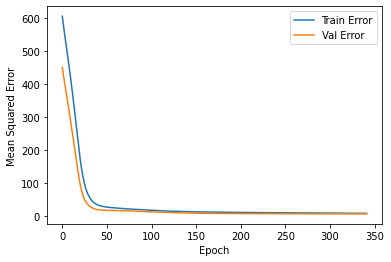

In [30]:
# plot Train Error dan Val Error menggunakan matplotlib plt
def plot_history():
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Squared Error')
    plt.plot(hist['epoch'], hist['mse'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'], label='Val Error')
    plt.legend()
plot_history()

Selanjutnya lakukan komparasi bagaimana performa model pada test dataset

In [32]:
# Lakukan Normalisasi pada test data untuk evaluasi
data_test_norm = (feature_test - train_mean) / train_std

mse, _, _ = model.evaluate(data_test_norm, label_test)

rmse = np.sqrt(mse)

print(rmse)

4/4 [==============================] - 0s 2ms/step - loss: 9.6442 - mae: 2.1882 - mse: 9.6442
3.105516349379705


Jika kita lihat di kaggle leaderboard, RMSE sekitar 3.18 berarti model kita sudah cukup baik dalam memprediksi, dan berada di posisi 5

In [33]:
# Lakukan percobaan dengan mengambil 2 sample dari train dataset yang sudah di normalisasikan (feature_train_norm[:2])
percobaan = (feature_train_norm[:2])
percobaan

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
192,-0.427448,1.484011,-1.114239,-0.256833,-1.021915,1.273277,-1.517903,1.262452,-0.543255,-0.088856,-1.509687,0.365233,-1.374464
138,-0.408222,-0.479907,1.574679,-0.256833,0.569434,-0.583574,1.044346,-0.993784,-0.656796,0.140768,1.257406,0.382577,1.182332


In [34]:
# Evaluasi nilai MEDV pada data pertama dengan index yang terlihat
data.loc[192]


CRIM         0.08664
ZN          45.00000
INDUS        3.44000
CHAS         0.00000
NX           0.43700
RM           7.17800
AGE         26.30000
DIS          6.47980
RAD          5.00000
TAX        398.00000
PTRATIO     15.20000
B          390.49000
LSTAT        2.87000
MEDV        36.40000
Name: 192, dtype: float64

In [35]:
# Evaluasi nilai MEDV pada data kedua dengan index yang terlihat
data.loc[138]

CRIM         0.2498
ZN           0.0000
INDUS       21.8900
CHAS         0.0000
NX           0.6240
RM           5.8570
AGE         98.2000
DIS          1.6686
RAD          4.0000
TAX        437.0000
PTRATIO     21.2000
B          392.0400
LSTAT       21.3200
MEDV        13.3000
Name: 138, dtype: float64

In [36]:
# Lakukan prediksi terhadap sample data yang kita pilih dan bandingkan hasilnya dengan nilai MEDV yang tertera
model.predict(percobaan)

# gunakan model.predict() untuk melakukan prediksi

array([[34.668137],
       [14.351934]], dtype=float32)

## Credits (Reference)

> - [Lex Fridman's MIT Deep Learning](https://github.com/lexfridman/mit-deep-learning)
> - [Aymeric Damien](https://github.com/aymericdamien/)
> - [GitHub Awesome Lists Topic](https://github.com/topics/awesome)
> * [Tensorflow Tutorial and House Price Prediction](https://www.kaggle.com/arunkumarramanan/tensorflow-tutorial-and-examples)
> - [Boston House Price Prediction](https://www.kaggle.com/shreayan98c/boston-house-price-prediction)